Populating the interactive namespace from numpy and matplotlib


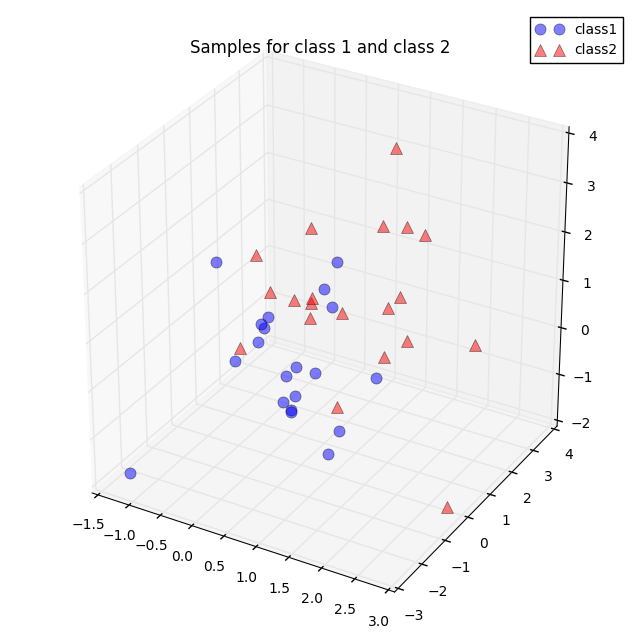

Mean Vector:
 [[ 0.60975943]
 [ 0.5374586 ]
 [ 0.48216967]]
Scatter Matrix:
 [[ 31.14130454   7.15912175   5.97698931]
 [  7.15912175  55.53372154  20.15116261]
 [  5.97698931  20.15116261  66.81426604]]
Covariance Matrix:
 [[ 0.79849499  0.18356722  0.15325614]
 [ 0.18356722  1.42394158  0.51669648]
 [ 0.15325614  0.51669648  1.71318631]]
Eigenvector 1: 
[[ 0.17078456]
 [ 0.60199742]
 [ 0.78002035]]
Eigenvalue 1 from scatter matrix: 83.67501240555174
Eigenvalue 1 from covariance matrix: 2.1455131386038904
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.96889159]
 [-0.24651611]
 [-0.02188361]]
Eigenvalue 2 from scatter matrix: 29.184803964234426
Eigenvalue 2 from covariance matrix: 0.7483283067752422
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.17911371]
 [-0.75949254]
 [ 0.62537138]]
Eigenvalue 3 from scatter matrix: 40.62947574869122
Eigenvalue 3 from covariance matrix: 1.0417814294536214
Scaling factor:  39.0

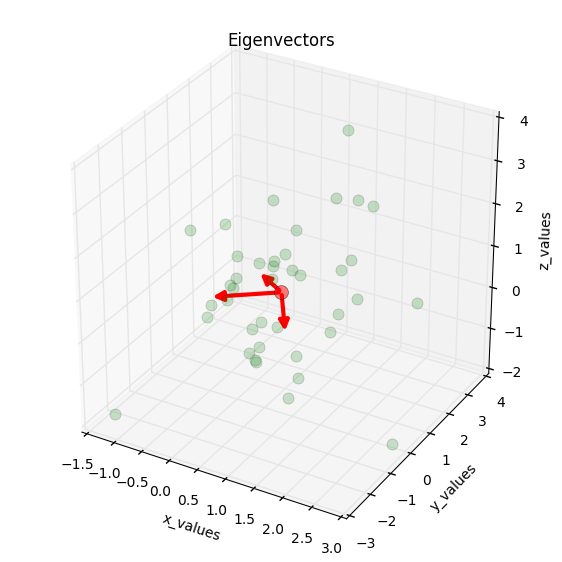

83.6750124056
40.6294757487
29.1848039642
Matrix W:
 [[ 0.17078456 -0.17911371]
 [ 0.60199742 -0.75949254]
 [ 0.78002035  0.62537138]]


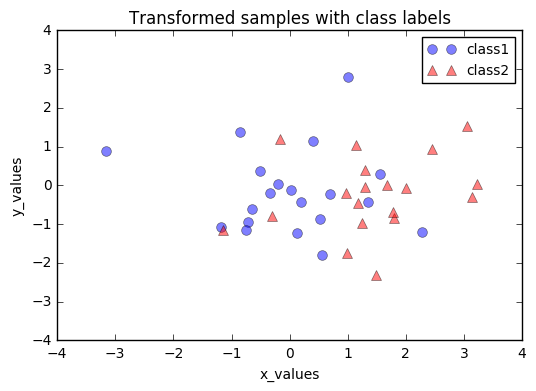

In [6]:
########################################
#PCA from scratch
#
#http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
########################################

#The purpose of PCA is to identify patterns and find 
#patterns to reduce the dimensions of the dataset 
#with minimal loss of information

#Here we're reducing the data
#to smaller dimensions with 
#minimal loss of information

#in PCA we are trying to find 
#the axes with maximum variances 
#where the data is most spread

#the axes or components are the 
#eigenvectors. An eigenvalue is
#associated to each eigenvector
#and gives the length or magnitude 
#of the eigenvector

#If we observe that all the eigenvalues 
#are of very similar magnitude, this is 
#a good indicator that our data is already 
#in a “good” subspace

#If they are much different, we would want to 
#use only those with the largest magnitude and
#use a different subspace to reduce dimensionality
#but preserve most of the information

#Starting with a simple example: 3D down to 2D
#from 2 different starting points

import numpy as np

np.random.seed(234234782) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

#Viewing our distributions
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#####
#1. Taking the whole dataset ignoring the class labels
#####

#combining matrices by column
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

#####
#2. Computing the d-dimensional mean vector
#####

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

#####
#3. a) Computing the Scatter Matrix
#####

scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

#####
#3. b) Computing the Covariance Matrix (alternatively to the scatter matrix)
#####

cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

#####
#4. Computing eigenvectors and corresponding eigenvalues
#####

# eigenvectors and eigenvalues from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')
    
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
    
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

#####
#5.1. Sorting the eigenvectors by decreasing eigenvalues
#####

for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])
    
#####
#5.2. Choosing k eigenvectors with the largest eigenvalues
#####

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

#####
#6. Transforming the samples onto the new subspace
#####

transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()